In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE5B4'

In [13]:
data = pd.read_csv('/Users/latabidary/application/2021.csv')
data.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [14]:
data_col = ['Country name', 'Regional indicator', 'Ladder score','Logged GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']


In [16]:
data = data[data_col].copy()

In [17]:
happy_df = data.rename(columns = {'Country name':'country_name','Regional indicator':'Regional_ind','Ladder score':'Happiness_score','Logged GDP per capita':'GDP_per_capita','Social support':'Social_support','Healthy life expectancy':'Life_expectancy','Freedom to make life choices':'Freedom_of_choices','Generosity':'Generosity','Perceptions of corruption':'Percep_of_corrupt'})
happy_df.head()

,country_name,Regional_ind,Happiness_score,GDP_per_capita,Social_support,Life_expectancy,Freedom_of_choices,Generosity,Percep_of_corrupt
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338


In [18]:
happy_df.isnull().sum()

country_name          0
Regional_ind          0
Happiness_score       0
GDP_per_capita        0
Social_support        0
Life_expectancy       0
Freedom_of_choices    0
Generosity            0
Percep_of_corrupt     0
dtype: int64

Text(0, 0.5, 'GDP per capita')

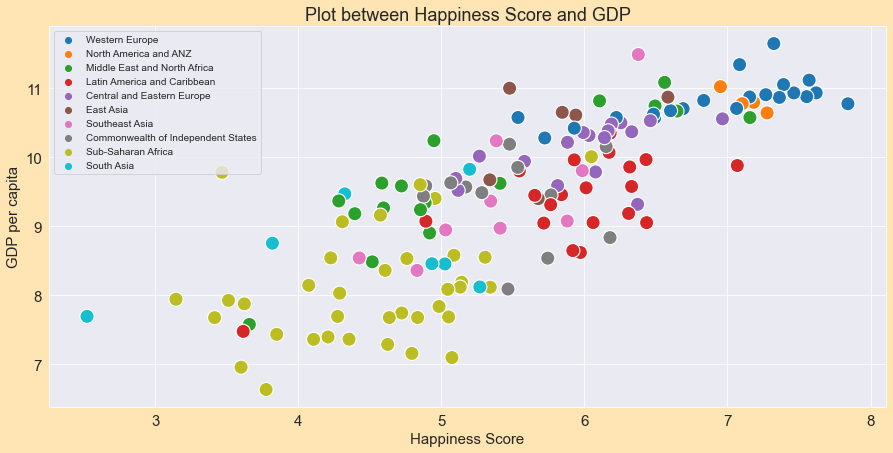

In [19]:
#plot between happyness and GDP
plt.rcParams['figure.figsize'] = (15,7)
plt.title("Plot between Happiness Score and GDP")
sns.scatterplot(x=happy_df.Happiness_score, y = happy_df.GDP_per_capita, hue = happy_df.Regional_ind,s = 200)
plt.legend(loc = 'upper left',fontsize = '10')
plt.xlabel("Happiness Score")
plt.ylabel("GDP per capita")


In [27]:
gdp_region = happy_df.groupby(['Regional_ind','GDP_per_capita']).sum()
gdp_region

Happiness_score  Social_support  \
Regional_ind               GDP_per_capita                                    
Central and Eastern Europe 9.318                     6.372           0.821   
                           9.520                     5.117           0.697   
                           9.590                     5.813           0.870   
                           9.693                     5.101           0.805   
                           9.787                     6.078           0.873   
...                                                    ...             ...   
Western Europe             10.933                    7.620           0.954   
                           11.053                    7.392           0.954   
                           11.117                    7.571           0.942   
                           11.342                    7.085           0.947   
                           11.647                    7.324           0.908   

                                           Life_expectancy  \
Regional_ind               GDP_per_capita                    
Central and Eastern Europe 9.318                    63.813   
                           9.520                    68.999   
                           9.590                    68.098   
                           9.693                    65.474   
                           9.787                    68.600   
...                                                    ...   
Western Europe             10.933                   72.700   
                           11.053                   73.300   
                           11.117                   74.400   
                           11.342                   72.400   
                           11.647                   72.600   

                                           Freedom_of_choices  Generosity  \
Regional_ind               GDP_per_capita                                   
Central and Eastern Europe 9.318                        0.869       0.257   
                           9.520                        0.785      -0.030   
                           9.590                        0.706       0.113   
                           9.693                        0.751       0.038   
                           9.787                        0.778       0.002   
...                                                       ...         ...   
Western Europe             10.933                       0.946       0.030   
                           11.053                       0.960       0.093   
                           11.117                       0.919       0.025   
                           11.342                       0.879       0.077   
                           11.647                       0.907      -0.034   

                                           Percep_of_corrupt  
Regional_ind               GDP_per_capita                     
Central and Eastern Europe 9.318                       0.917  
                           9.520                       0.901  
                           9.590                       0.931  
                           9.693                       0.905  
                           9.787                       0.835  
...                                                      ...  
Western Europe             10.933                      0.179  
                           11.053                      0.270  
                           11.117                      0.292  
                           11.342                      0.363  
                           11.647                      0.386  

[148 rows x 6 columns]

In [28]:
gdp_region = happy_df.groupby('Regional_ind')['GDP_per_capita'].sum()
gdp_region

Regional_ind
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: GDP_per_capita, dtype: float64

Text(0, 0.5, '')

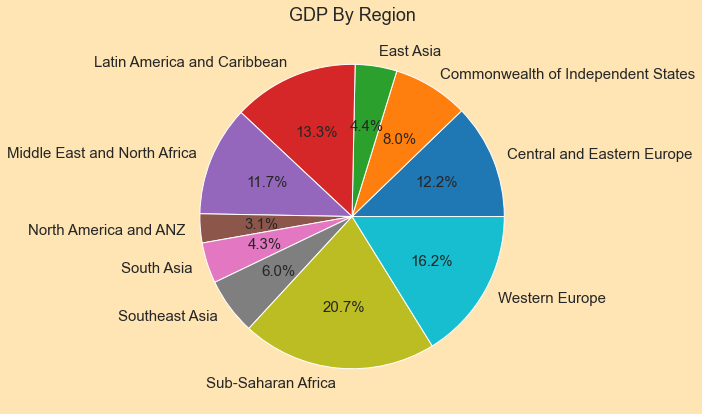

In [32]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title("GDP By Region")
plt.ylabel('')


In [33]:
#Total countries
total_country = happy_df.groupby('Regional_ind')[['country_name']].count()
print(total_country)

                                    country_name
Regional_ind                                    
Central and Eastern Europe                    17
Commonwealth of Independent States            12
East Asia                                      6
Latin America and Caribbean                   20
Middle East and North Africa                  17
North America and ANZ                          4
South Asia                                     7
Southeast Asia                                 9
Sub-Saharan Africa                            36
Western Europe                                21


<AxesSubplot:>

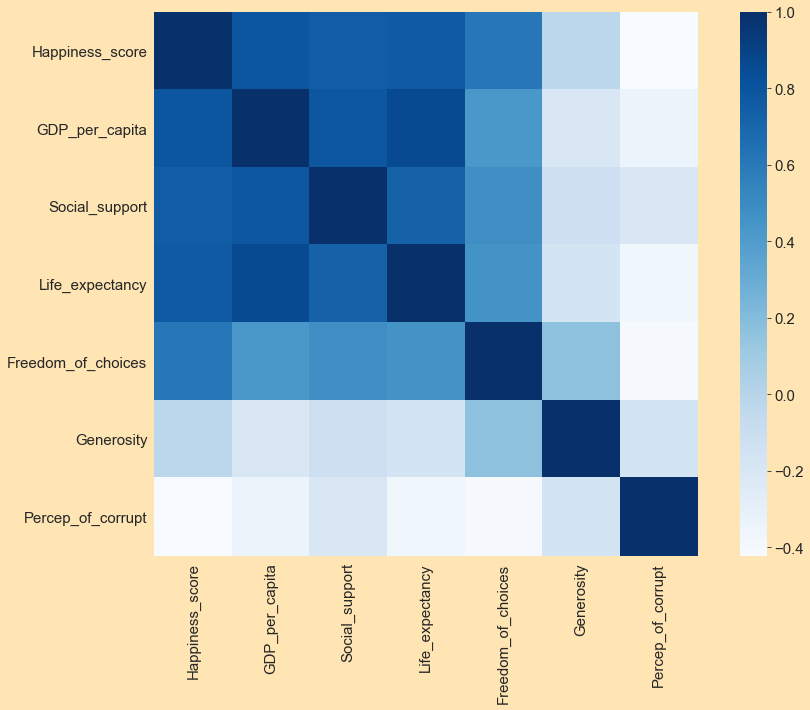

In [39]:
corr = happy_df.corr(method = "pearson")
f, axis = plt.subplots(figsize = (15,10))
sns.heatmap(corr,mask = np.zeros_like(corr),cmap = "Blues", square = True, ax = axis)

In [41]:
#Corruption in regions
corruption = happy_df.groupby('Regional_ind')[['Percep_of_corrupt']].mean()
corruption

,Percep_of_corrupt
Regional_ind,
Central and Eastern Europe,0.850529
Commonwealth of Independent States,0.725083
East Asia,0.683333
Latin America and Caribbean,0.792600
Middle East and North Africa,0.762235
North America and ANZ,0.449250
South Asia,0.797429
Southeast Asia,0.709111
Sub-Saharan Africa,0.765944


<BarContainer object of 10 artists>

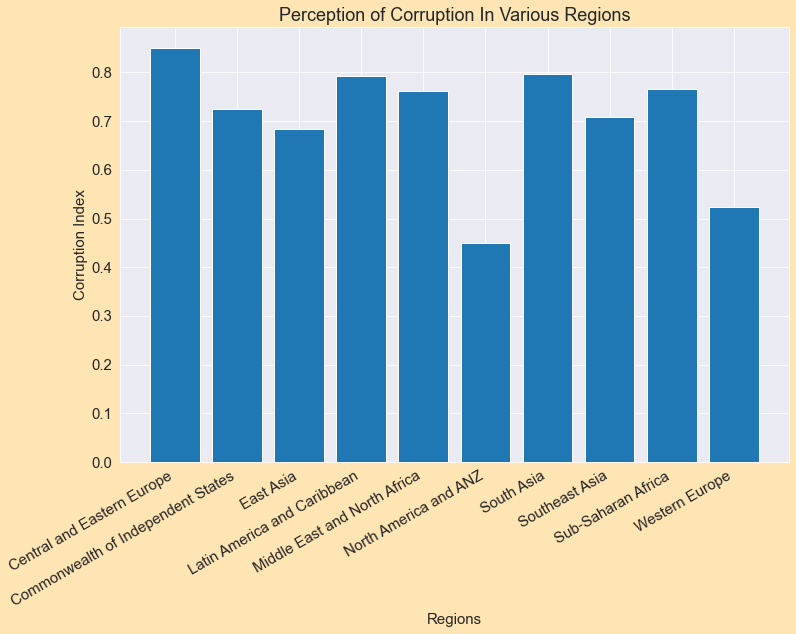

In [43]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title("Perception of Corruption In Various Regions")
plt.xlabel('Regions',fontsize = 15)
plt.ylabel('Corruption Index',fontsize = 15)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(corruption.index, corruption.Percep_of_corrupt)

In [14]:
top_10 = happy_df.head(10)
bottom_10 = happy_df.tail(10)

<ipython-input-26-c3e42ad45b4a>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
<ipython-input-26-c3e42ad45b4a>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')


Text(599.1068181818181, 0.5, 'Life Expectency')

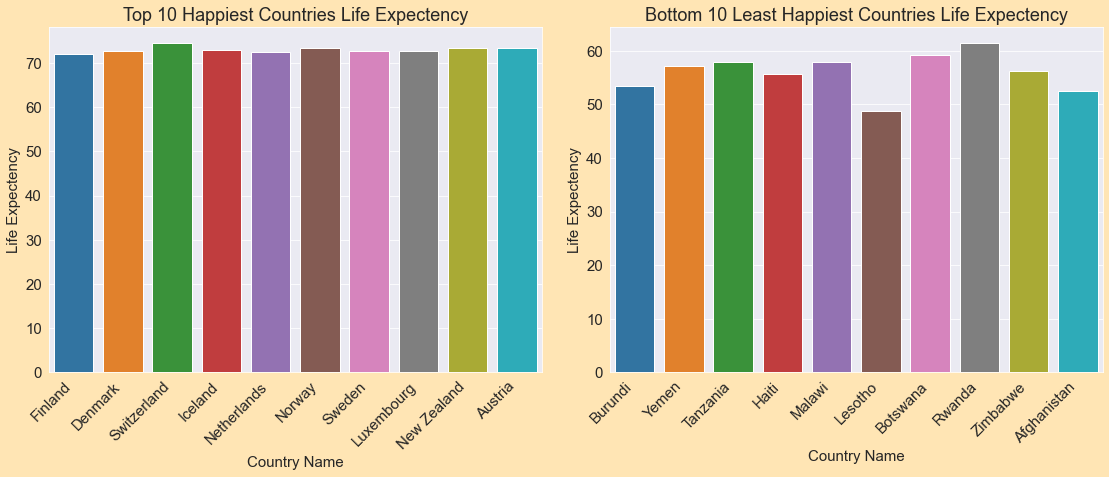

In [26]:
fig,axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad = 2)
xlabels = top_10.country_name
axes[0].set_title("Top 10 Happiest Countries Life Expectency")
axes[0].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x = top_10.country_name, y = top_10.Life_expectancy, ax = axes[0])
axes[0].set_xlabel("Country Name")
axes[0].set_ylabel("Life Expectency")

xlabels = bottom_10.country_name
axes[1].set_title("Bottom 10 Least Happiest Countries Life Expectency")
axes[1].set_xticklabels(xlabels, rotation = 45, ha = 'right')
sns.barplot(x = bottom_10.country_name, y = bottom_10.Life_expectancy, ax = axes[1])
axes[1].set_xlabel("Country Name")
axes[1].set_ylabel("Life Expectency")


Text(0, 0.5, 'Happiness Score')

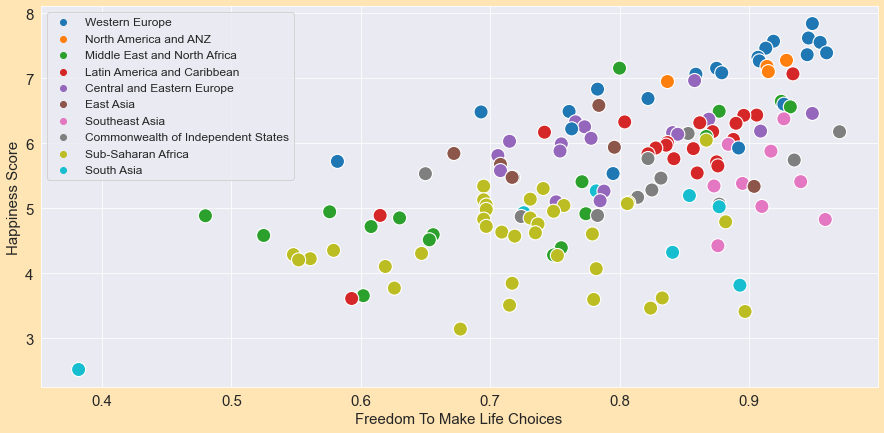

In [24]:
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.Freedom_of_choices, y = happy_df.Happiness_score, hue = happy_df.Regional_ind, s = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel("Freedom To Make Life Choices")
plt.ylabel("Happiness Score")

<BarContainer object of 10 artists>

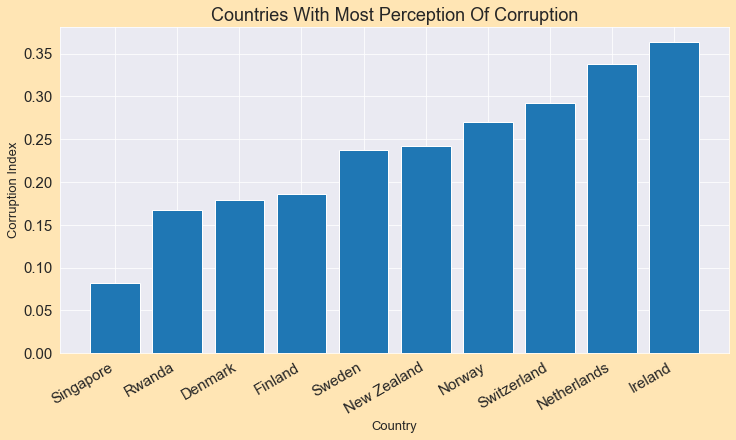

In [29]:
country = happy_df.sort_values(by = "Percep_of_corrupt").head(10)
plt.rcParams['figure.figsize'] = (12,6)
plt.title("Countries With Most Perception Of Corruption")
plt.xlabel('Country', fontsize = 13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha = 'right')
plt.bar(country.country_name,country.Percep_of_corrupt)

Text(0, 0.5, 'Corruption')

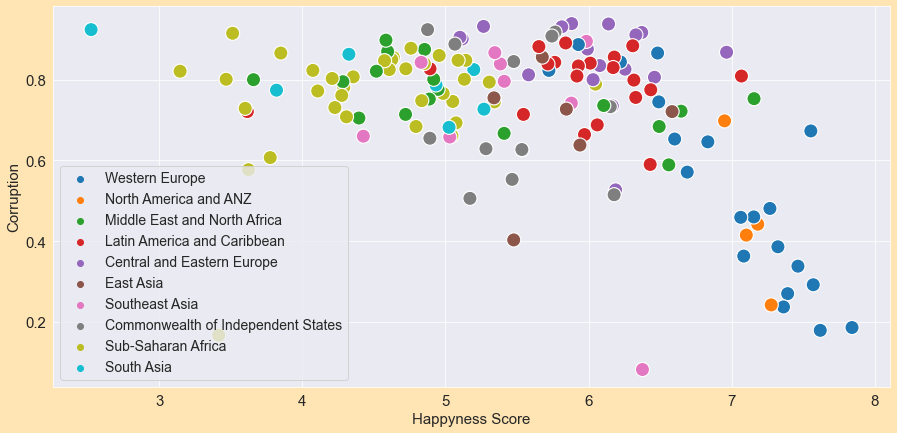

In [20]:
#corruption vs happiness
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x = happy_df.Happiness_score, y = happy_df.Percep_of_corrupt, hue = happy_df.Regional_ind, s= 200)
plt.legend(loc = 'lower left', fontsize = 14)
plt.xlabel("Happyness Score")
plt.ylabel("Corruption")